Our scenario continues:

As a customer analyst, I want to know who has spent the most money with us over their lifetime. I have monthly charges and tenure, so I think I will be able to use those two attributes as features to estimate total_charges. I need to do this within an average of $5.00 per customer.

create a notebook named model.ipynb

 #### 1. run all your previous scipts that acuired, prepared, split, and scaled your data.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error,r2_score, explained_variance_score
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

import env
import wrangle
import split_scale
import feature


In [21]:
# acquire data and remove null values
df = wrangle.wrangle_telco()

In [ ]:
sns.pairplot(data=df)

In [22]:
# create dataframe of only monthly_charges, tenure, and total_charges
df = df[['monthly_charges', 'tenure', 'total_charges']]
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1685 entries, 0016-QLJIS to 9975-GPKZU
Data columns (total 3 columns):
monthly_charges    1685 non-null float64
tenure             1685 non-null int64
total_charges      1685 non-null float64
dtypes: float64(2), int64(1)
memory usage: 52.7+ KB


In [23]:
#create data frames of X_train, x_test, y_train, y_test.
train, test = split_scale.split_my_data(df)
X_train = train[['monthly_charges','tenure']]
y_train = train[['total_charges']]

X_test = test[['monthly_charges', 'tenure']]
y_test = test[['total_charges']]

X_train, y_train, X_test, y_test

(             monthly_charges  tenure
 customer_id                         
 2192-CKRLV             49.20      72
 7596-IIWYC             20.25      27
 6408-WHTEF             89.40      72
 3070-FNFZQ             20.40      23
 8774-GSBUN             25.40      72
 7101-HRBLJ             83.70      72
 0320-DWVTU             99.50      53
 2368-GAKKQ            113.65      70
 4822-LPTYJ            103.75      72
 0378-CJKPV            112.10      72
 4231-LZUYM             25.65      72
 1767-CJKBA             25.10      66
 2900-PHPLN             19.55      70
 4836-WNFNO             25.00      72
 1354-YZFNB             19.55       4
 5236-PERKL            112.95      57
 7242-EDTYC             19.55      44
 8205-VSLRB             77.30      70
 2481-SBOYW             25.00      61
 9975-GPKZU             19.75      46
 2228-BZDEE             20.10      54
 8946-BFWSG             25.25      63
 2256-YLYLP             72.95      68
 1460-UZPRJ             19.95      60
 1116-FRYVH 

In [24]:
# scale data using standard scaler
scaler, train_scaled, test_scaled = split_scale.standard_scaler(df)
scaler, train_scaled, test_scaled

(StandardScaler(copy=True, with_mean=True, with_std=True),
             monthly_charges    tenure  total_charges
 2192-CKRLV        -0.349191  0.839851      -0.069496
 7596-IIWYC        -1.184789 -1.700684      -1.252726
 6408-WHTEF         0.811120  0.839851       1.017626
 3070-FNFZQ        -1.180459 -1.926509      -1.275844
 8774-GSBUN        -1.036142  0.839851      -0.763179
 7101-HRBLJ         0.646599  0.839851       0.908879
 0320-DWVTU         1.102642 -0.232820       0.647306
 2368-GAKKQ         1.511060  0.726938       1.625312
 4822-LPTYJ         1.225311  0.839851       1.394693
 0378-CJKPV         1.466321  0.839851       1.635694
 4231-LZUYM        -1.028926  0.839851      -0.728220
 1767-CJKBA        -1.044801  0.501113      -0.801833
 2900-PHPLN        -1.204993  0.726938      -0.893470
 4836-WNFNO        -1.047687  0.839851      -0.742919
 1354-YZFNB        -1.204993 -2.999179      -1.435261
 5236-PERKL         1.490855 -0.006994       1.052022
 7242-EDTYC        -1.2

In [25]:
# Create X_train_scaled, y_train_scaled, X_test_scaled, and y_test_scaled
X_train_scaled = train_scaled[['monthly_charges','tenure']]
y_train_scaled = train_scaled[['total_charges']]

X_test_scaled = test_scaled[['monthly_charges', 'tenure']]
y_test_scaled = test_scaled[['total_charges']]

X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled



(            monthly_charges    tenure
 2192-CKRLV        -0.349191  0.839851
 7596-IIWYC        -1.184789 -1.700684
 6408-WHTEF         0.811120  0.839851
 3070-FNFZQ        -1.180459 -1.926509
 8774-GSBUN        -1.036142  0.839851
 7101-HRBLJ         0.646599  0.839851
 0320-DWVTU         1.102642 -0.232820
 2368-GAKKQ         1.511060  0.726938
 4822-LPTYJ         1.225311  0.839851
 0378-CJKPV         1.466321  0.839851
 4231-LZUYM        -1.028926  0.839851
 1767-CJKBA        -1.044801  0.501113
 2900-PHPLN        -1.204993  0.726938
 4836-WNFNO        -1.047687  0.839851
 1354-YZFNB        -1.204993 -2.999179
 5236-PERKL         1.490855 -0.006994
 7242-EDTYC        -1.204993 -0.740926
 8205-VSLRB         0.461872  0.726938
 2481-SBOYW        -1.047687  0.218831
 9975-GPKZU        -1.199221 -0.628014
 2228-BZDEE        -1.189119 -0.176363
 8946-BFWSG        -1.040472  0.331744
 2256-YLYLP         0.336316  0.614025
 1460-UZPRJ        -1.193448  0.162375
 1116-FRYVH        -0.632

In [ ]:
# Perform feature selection using RFE

In [26]:
from sklearn.linear_model import LinearRegression

lm1 = LinearRegression()

lm1.fit(X_train_scaled,y_train_scaled)

lm1_y_intercept = lm1.intercept_

lm1_coefficients = lm1.coef_

lm1_y_intercept, lm1_coefficients

(array([-1.25229225e-16]), array([[0.82238767, 0.29099306]]))

In [27]:
y_pred_lm1 = lm1.predict(X_train_scaled)
y_pred_lm1, y_pred_lm1.shape, y_train_scaled

(array([[-0.04277994],
        [-1.46924307],
        [ 0.91144616],
        ...,
        [-0.64276278],
        [-0.82278878],
        [-0.13654096]]), (1348, 1),             total_charges
 2192-CKRLV      -0.069496
 7596-IIWYC      -1.252726
 6408-WHTEF       1.017626
 3070-FNFZQ      -1.275844
 8774-GSBUN      -0.763179
 7101-HRBLJ       0.908879
 0320-DWVTU       0.647306
 2368-GAKKQ       1.625312
 4822-LPTYJ       1.394693
 0378-CJKPV       1.635694
 4231-LZUYM      -0.728220
 1767-CJKBA      -0.801833
 2900-PHPLN      -0.893470
 4836-WNFNO      -0.742919
 1354-YZFNB      -1.435261
 5236-PERKL       1.052022
 7242-EDTYC      -1.143162
 8205-VSLRB       0.676063
 2481-SBOYW      -0.879354
 9975-GPKZU      -1.128949
 2228-BZDEE      -1.042251
 8946-BFWSG      -0.850305
 2256-YLYLP       0.464149
 1460-UZPRJ      -0.972760
 1116-FRYVH      -0.692580
 8766-PAFNE       0.701981
 1248-DYXUB      -0.984057
 7647-GYYKX      -1.037234
 7971-HLVXI       0.922081
 8148-NLEGT      -1.067605


In [28]:
r2 = r2_score(y_train_scaled, y_pred_lm1)
r2

0.9622743261396984

In [29]:
mean_squared_error(y_train_scaled,y_pred_lm1)

0.03772567386030159

## Establish Baseline

In [30]:
from math import sqrt

y_pred_baseline = np.array([y_train_scaled.mean()]*len(y_train_scaled))
MSE = mean_squared_error(y_train_scaled, y_pred_baseline)
SSE = MSE * len(y_train_scaled)
RMSE = sqrt(MSE)

evs = explained_variance_score(y_train_scaled, y_pred_baseline)

y_train_scaled.mean() , y_pred_baseline, y_pred_baseline.shape, MSE, SSE, RMSE, evs

(total_charges   -2.168559e-16
 dtype: float64, array([[-2.16855877e-16],
        [-2.16855877e-16],
        [-2.16855877e-16],
        ...,
        [-2.16855877e-16],
        [-2.16855877e-16],
        [-2.16855877e-16]]), (1348, 1), 1.0, 1348.0, 1.0, 0.0)

In [31]:
fig = pd.DataFrame({'monthly_charges': X_train_scaled.monthly_charges.ravel(),'actual': y_train_scaled.total_charges, 
              'lm1': y_pred_lm1.ravel()})
fig


,monthly_charges,actual,lm1
2192-CKRLV,-0.349191,-0.069496,-0.042780
7596-IIWYC,-1.184789,-1.252726,-1.469243
6408-WHTEF,0.811120,1.017626,0.911446
3070-FNFZQ,-1.180459,-1.275844,-1.531396
8774-GSBUN,-1.036142,-0.763179,-0.607720
7101-HRBLJ,0.646599,0.908879,0.776145
0320-DWVTU,1.102642,0.647306,0.839050
2368-GAKKQ,1.511060,1.625312,1.454211
4822-LPTYJ,1.225311,1.394693,1.252072
0378-CJKPV,1.466321,1.635694,1.450275


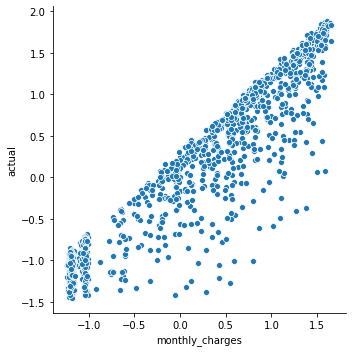

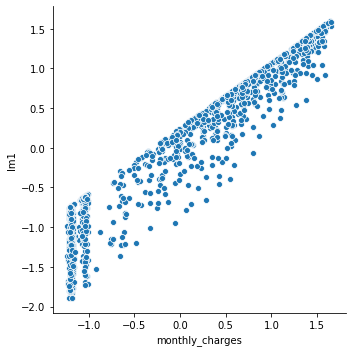

In [32]:
sns.relplot(x='monthly_charges',y='actual',data=fig)
sns.relplot(x='monthly_charges',y='lm1',data=fig)

(-1.75, 1.75)

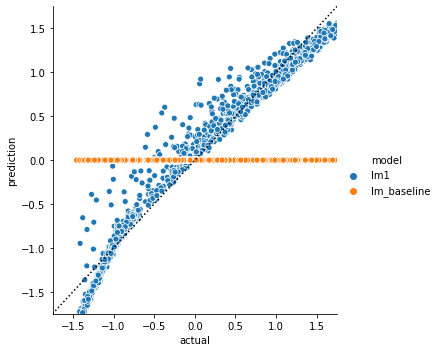

In [33]:
pd.DataFrame({'actual': y_train_scaled.total_charges,
              'lm1': y_pred_lm1.ravel(),
              'lm_baseline': y_pred_baseline.ravel()})\
.melt(id_vars = ['actual'], var_name = 'model', value_name = 'prediction')\
.pipe((sns.relplot, 'data'), x = 'actual', y = 'prediction', hue = 'model')

min, max = -1.75,1.75
plt.plot([min,max],[min,max],c='black',ls = ':')
plt.ylim(min, max)
plt.xlim(min, max)


## Compare one variable at a time

### monthly_charges

In [34]:
df = wrangle.wrangle_telco()

In [35]:
df = df[['monthly_charges', 'tenure', 'total_charges']]
df

,monthly_charges,tenure,total_charges
customer_id,,,
0016-QLJIS,90.45,65,5957.90
0017-DINOC,45.20,54,2460.55
0019-GFNTW,45.05,56,2560.10
0056-EPFBG,39.40,20,825.40
0078-XZMHT,85.15,72,6316.20
0114-IGABW,58.25,71,4145.90
0123-CRBRT,88.10,61,5526.75
0191-EQUUH,35.05,25,844.45
0214-JHPFW,57.80,70,4039.30


In [36]:
train, test = split_scale.split_my_data(df)

In [37]:
scaler, train_scaled, test_scaled = split_scale.min_max_scaler(df)

In [38]:
X_train = train[['monthly_charges', 'tenure']]
y_train = train[['total_charges']]

X_test = test[['monthly_charges', 'tenure']]
y_test = test[['total_charges']]

X_train_scaled = train_scaled[['monthly_charges', 'tenure']]
y_train_scaled = train_scaled[['total_charges']]

X_test_scaled = test_scaled[['monthly_charges', 'tenure']]
y_test_scaled = test_scaled[['total_charges']]

In [39]:
from sklearn.linear_model import LinearRegression

lm1 = LinearRegression()

In [40]:
lm1.fit(X_train_scaled, y_train_scaled)

lm1_y_intercept = lm1.intercept_

lm1_coefficients = lm1.coef_

lm1_y_intercept, lm1_coefficients

(array([-0.13349922]), array([[0.7174589 , 0.32479217]]))

In [41]:
y_pred_lm1 = lm1.predict(X_train_scaled)

In [42]:
mse_lm1 = mean_squared_error(y_train_scaled, y_pred_lm1)

r2_lm1 = r2_score(y_train_scaled, y_pred_lm1)

mse_lm1, r2_lm1

(0.0030709782807332884, 0.9656068295396857)

In [44]:
y_pred_baseline = np.array([y_train_scaled.mean()]*len(y_train_scaled))
MSE = mean_squared_error(y_train_scaled, y_pred_baseline)
SSE = MSE * len(y_train_scaled)
RMSE = sqrt(MSE)

evs = explained_variance_score(y_train_scaled, y_pred_baseline)

SSE, evs


(30.0908484665958, 1.1102230246251565e-16)

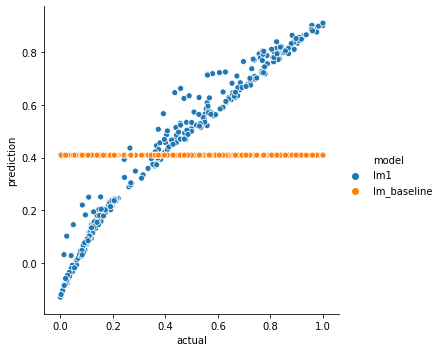

In [53]:
pd.DataFrame({'actual': y_train_scaled.total_charges,
              'lm1': y_pred_lm1.ravel(),
              'lm_baseline': y_pred_baseline.ravel()})\
.melt(id_vars = ['actual'], var_name = 'model', value_name = 'prediction')\
.pipe((sns.relplot,'data'), x = 'actual', y = 'prediction', hue = 'model')
